In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

import copy
import math

In [25]:
# load the dataset
file = "data/data_contrast.txt"
x_train, y_train = load_data_multi(file)
devide = 109
x_tumor = x_train[0:devide, :]
x_normal = x_train[devide:, :]
y_tumor = y_train[0:devide]
y_normal = y_train[devide:]

x_header = load_data_header(file)
labels = ["tumor", "normal"]

#print(x_train)

In [26]:
# print x_tumor
print("Type of x_tumor:", type(x_tumor))
print("Last five elements of x_tumor are:\n", x_tumor[-5:])

# print x_normal
print("Type of x_normal:", type(x_normal))
print("First five elements of x_normal are:\n", x_normal[:5])

# print y_tumor
print("Type of y_tumor:", type(y_tumor))
print("Last five elements of y_tumor are:\n", y_tumor[-5:])

# print x_normal
print("Type of y_normal:", type(y_normal))
print("First five elements of y_normal are:\n", y_normal[:5])


print('The shape of x_tumor is:', x_tumor.shape)
print('The shape of x_normal is:', x_normal.shape)
print('The shape of y_tumor is: ', y_tumor.shape)
print('The shape of y_normal is: ', y_normal.shape)

print("Labels: ", labels)
print('Number of training examples (m):', len(x_train))
print()

Type of x_tumor: <class 'numpy.ndarray'>
Last five elements of x_tumor are:
 [[0.30961233 0.44397239 0.29500797 0.91715349 0.76818907 0.90254914]
 [0.11404104 0.21382695 0.11404104 0.11404104 0.14825335 0.11404104]
 [0.44535041 0.3580858  0.43933216 0.13841972 0.88167344 0.72218985]
 [0.4091752  0.63155303 0.33208422 0.61079777 0.5426019  0.16900715]
 [0.52438293 1.11431374 0.34084891 0.98977279 0.96355364 0.84229009]]
Type of x_normal: <class 'numpy.ndarray'>
First five elements of x_normal are:
 [[0.37755531 0.11474729 0.29894653 0.3557166  0.41595893 0.24957536]
 [0.13187297 0.         0.         0.         0.13187297 0.42858714]
 [0.17040193 0.         0.33631889 0.         0.39618449 0.63900724]
 [0.18330582 0.18330582 0.         0.         0.18330582 0.        ]
 [0.34291393 0.         0.53886523 0.17145696 0.32148181 0.17145696]]
Type of y_tumor: <class 'numpy.ndarray'>
Last five elements of y_tumor are:
 [3.75083385 2.9656902  4.68955003 4.07867793 4.31040266]
Type of y_normal:

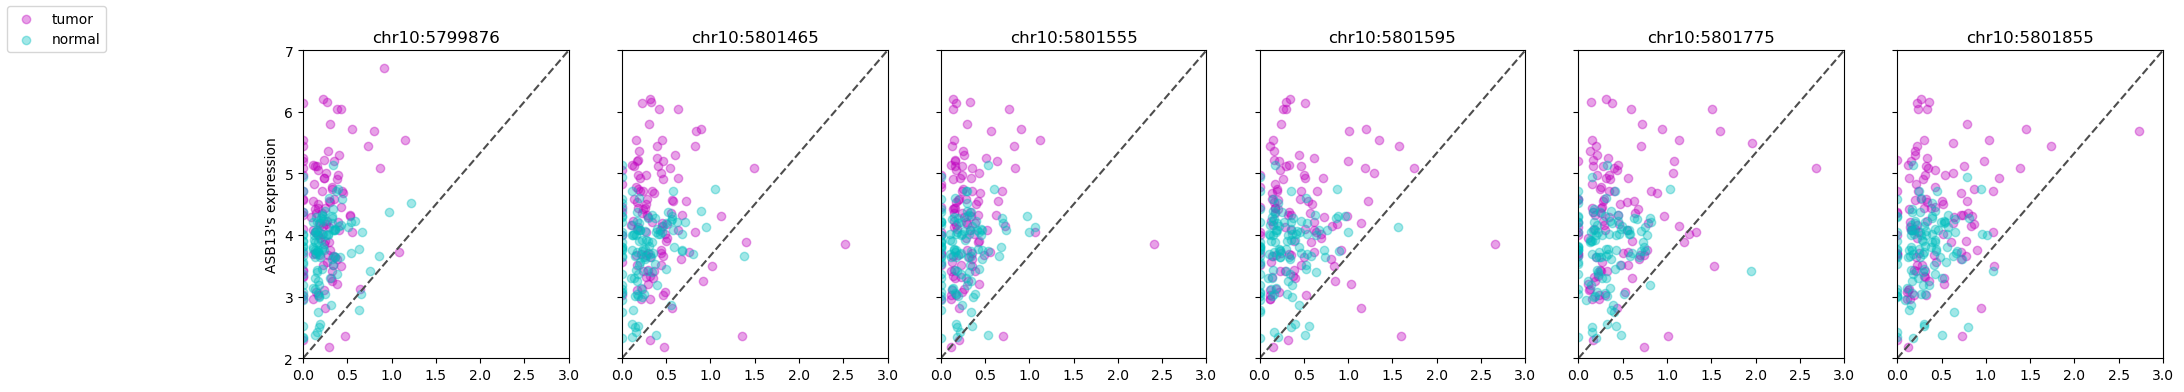

In [63]:
fig,ax=plt.subplots(1, 6, figsize=(24, 4), sharey=True)
for i in range(len(ax)):
    ax[i].set_xlim(0,3)
    ax[i].set_ylim(2,7)
    ax[i].scatter(x_tumor[:,i], y_tumor, c="m", alpha=0.37, marker="o")
    ax[i].scatter(x_normal[:,i], y_normal,c="c", alpha=0.37, marker="o")

    ax[i].set_title(x_header[i])
    ax[i].plot(ax[i].get_xlim(), ax[i].get_ylim(), ls="--", c=".3")

fig.legend(labels, loc = "upper left")
ax[0].set_ylabel("ASB13's expression")
plt.show()

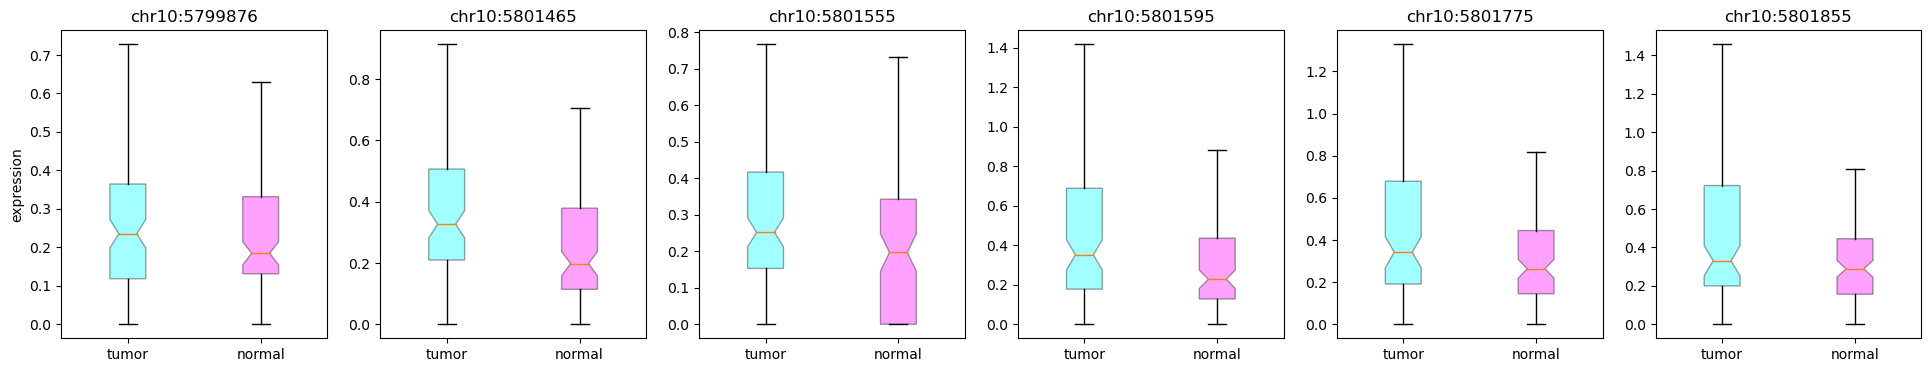

In [76]:
fig,ax=plt.subplots(1, 6, figsize=(24, 4))
colors = ['cyan', 'magenta']
for i in range(len(ax)):
    box = ax[i].boxplot([x_tumor[:,i], x_normal[:,i]], showfliers=False, notch=True, widths=0.27, labels=labels, patch_artist = True)
    for patch, color in zip(box['boxes'], colors):
        patch.set(facecolor=color, alpha=0.37)
    ax[i].set_title(x_header[i], loc="center")

ax[0].set_ylabel("expression")
plt.show()